In [9]:
# import librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# loading the data 

data = pd.read_csv('C:\\Users\\DELL\\Kaggle\\Challenges\\house-prices\\data\\train.csv')


In [11]:
# overview of the challenge

# from 79 features, predict the final price of a residence.
# target: SalePrice
# SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.


In [12]:
# plan

# 1. EDA
# 2. Data Cleaning
# 3. Feature Engineering
# 4. Model testing
# 5. Predictions and submissiun

In [13]:
# taking a look at the data as a whole.

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# we have 1460 rows and 81 columns

data.shape

(1460, 81)

In [7]:
# we have 43 categorical features and 36 numerical

data.drop(columns=['Id','SalePrice']).dtypes.sort_values()

MSSubClass        int64
GrLivArea         int64
Fireplaces        int64
TotRmsAbvGrd      int64
BsmtFinSF1        int64
                  ...  
BsmtFinType2     object
Heating          object
SaleType         object
RoofMatl         object
SaleCondition    object
Length: 79, dtype: object

In [9]:
pd.options.display.max_rows = 82

In [10]:
# lets check for nulls

data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [15]:
# this is the descriptive stats of the numerical data, not very ink to eye right?

data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
# and this is the descriptive stats of the target

# mean house price: 180,900
# standard deviation: 80,000
# min house price: 34,900
# max house price: 755,000

data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

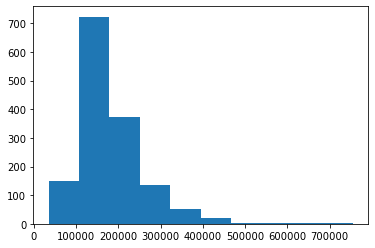

In [6]:
# the freq distribuition of the houses prices shows that most of them are between 100,000 and 200,000

target = data['SalePrice']

plt.hist(target)

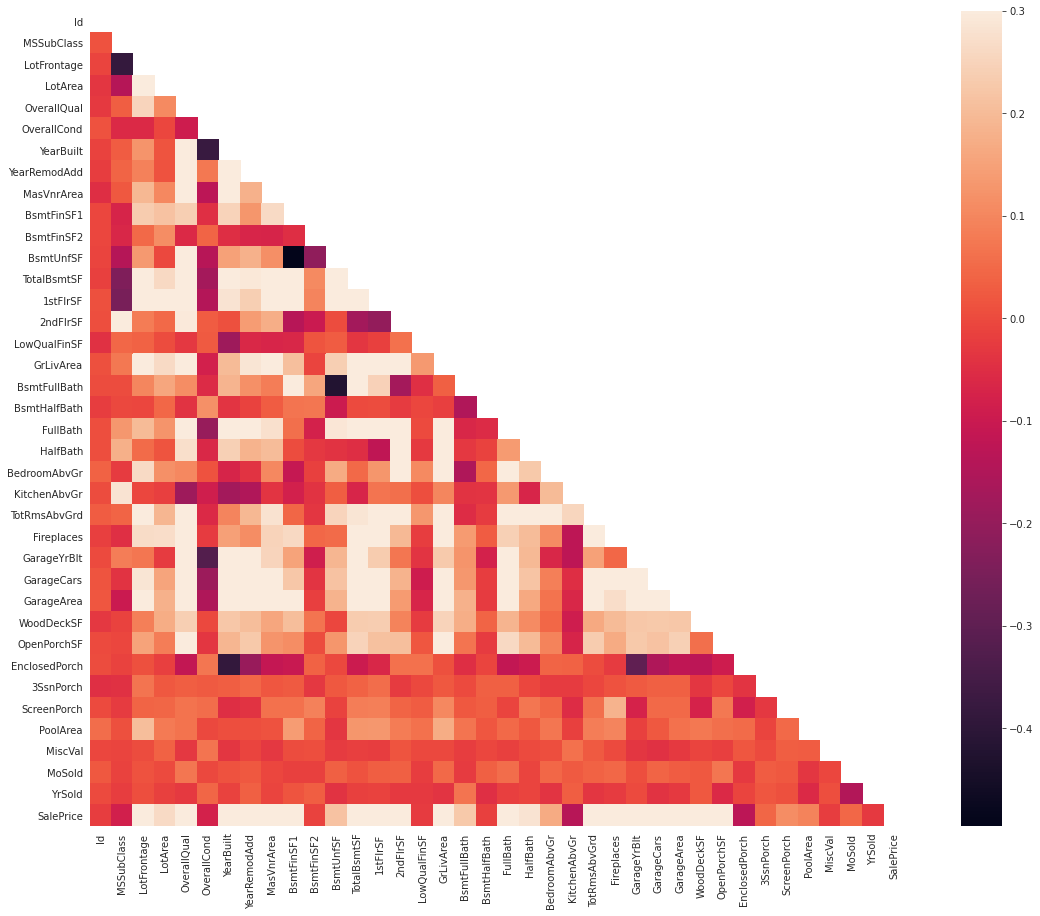

In [20]:
# correlation matrix between the variables

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [25]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [29]:
# Biggest correlations:

# OverallQual      0.79 - Overall material and finish quality
# GrLivArea        0.71 - Above grade (ground) living area square feet
# GarageCars       0.64 - Size of garage in car capacity
# GarageArea       0.62 - Size of garage in square feet
# TotalBsmtSF      0.61 - Total square feet of basement area
# 1stFlrSF         0.60 - First Floor square feet
# FullBath         0.56 - Full bathrooms above grade
# TotRmsAbvGrd     0.53 - Total rooms above grade (does not include bathrooms)
# YearBuilt        0.52 - Original construction date
# YearRemodAdd     0.51 - Remodel date
# GarageYrBlt      0.48 - Year garage was built
# MasVnrArea       0.47 - Masonry veneer type
# Fireplaces       0.46 - Number of fireplaces

# lets analyse this correlations


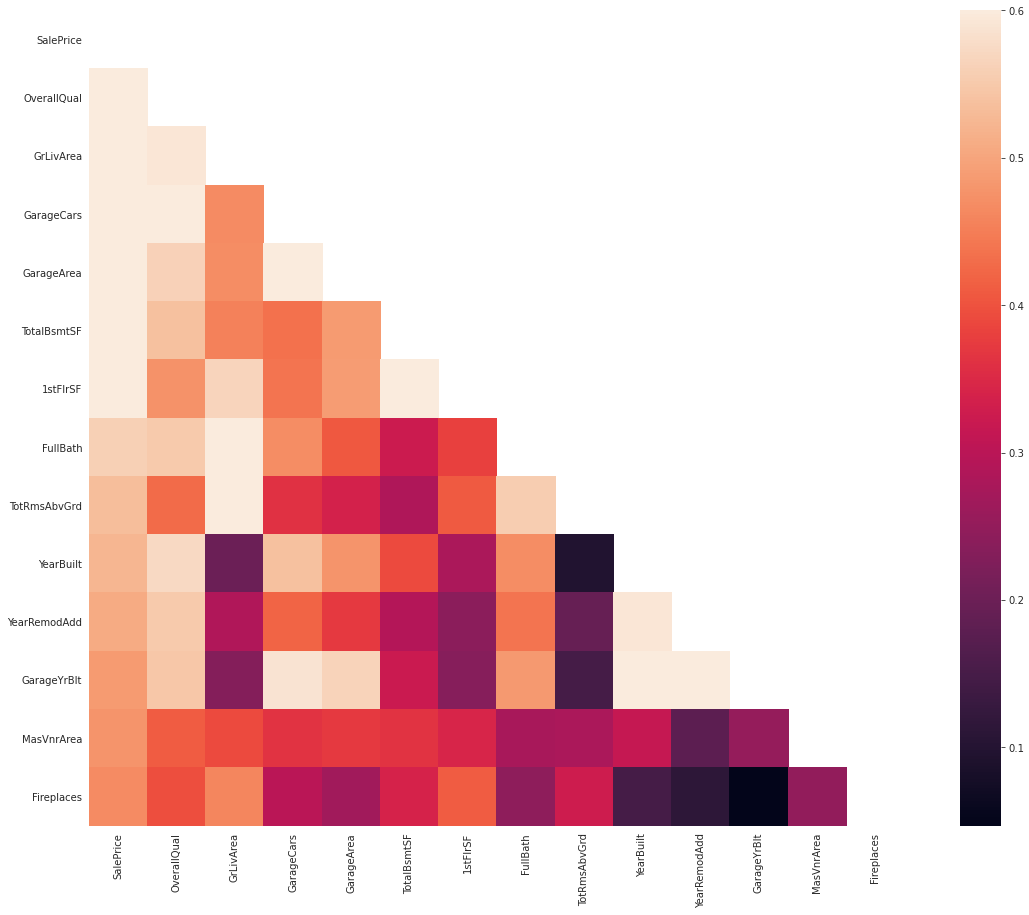

In [28]:
# this is a heatmap of the most correlated to the target features

corr = data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
      'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
      'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=.6, square=True)

In [ ]:
# OverallQual - has high correlation to pretty much every other interesting feature, besides Fireplaces, MasVnrArea, TotRmsAbvGrd
# GrLivArea - has high correlation to TotRmsAbvGrd, FullBath, 1stFlrSF
# GarageCars - has high correlation to GarageYrBlt, YearBuilt and GarageArea.
# GarageArea - has high correlation to GarageYrBuilt, YearBuilt
# TotalBsmtSF - Has high correlation only to 1stFlrSF - GOOD
# 1stFlSF - has high correlation to GrLiveArea, GarageArea and TotalBsmArea
# FullBath - has high correlation with TotalRmsAbvGrade, GrLivArea, GarageYrBlt
# TotRmsAbvGrd - has high correlation with GrLivArea

# features to take - OverallQual, TotRmsAbvGrd, MasVnrArea, Fireplaces, BsmFullbath, LotArea, WoodDeckSF

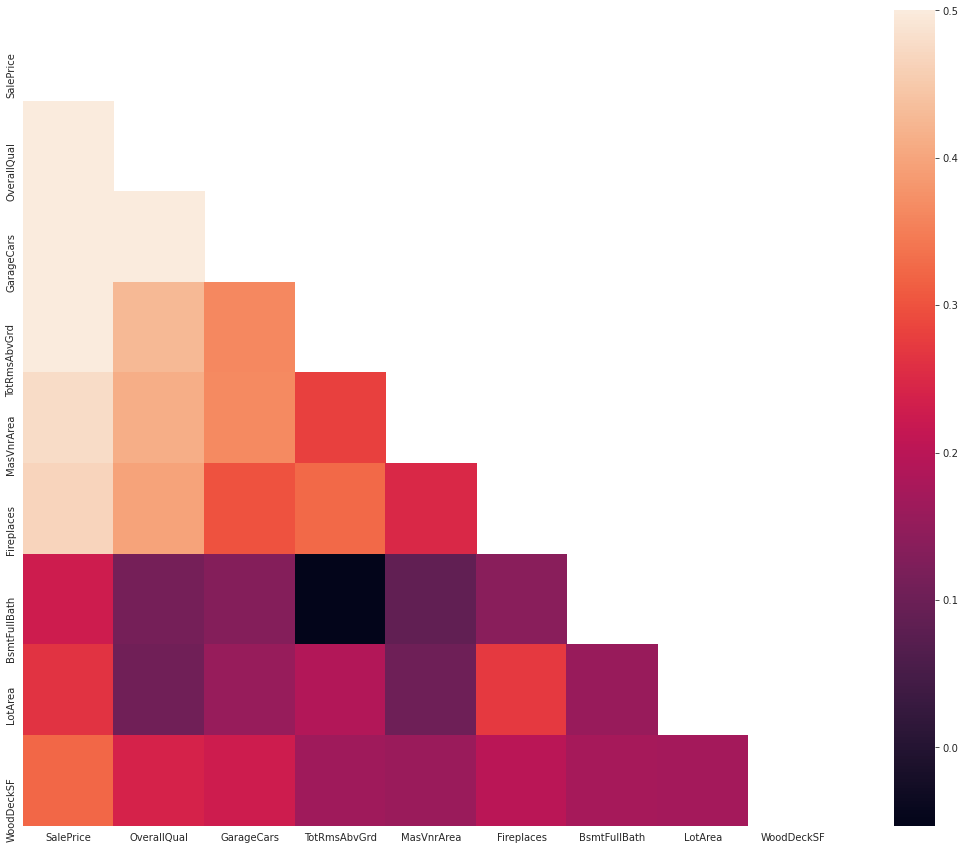

In [39]:
# lets get more features, that are less correlated but still are able to give information

corr = data[['SalePrice', 'OverallQual', 'GarageCars','TotRmsAbvGrd','MasVnrArea', 'Fireplaces', 'BsmtFullBath', 'LotArea' ,'WoodDeckSF']].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True)

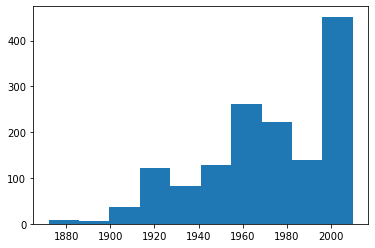

In [41]:
plt.hist(data['YearBuilt'])
plt.show()


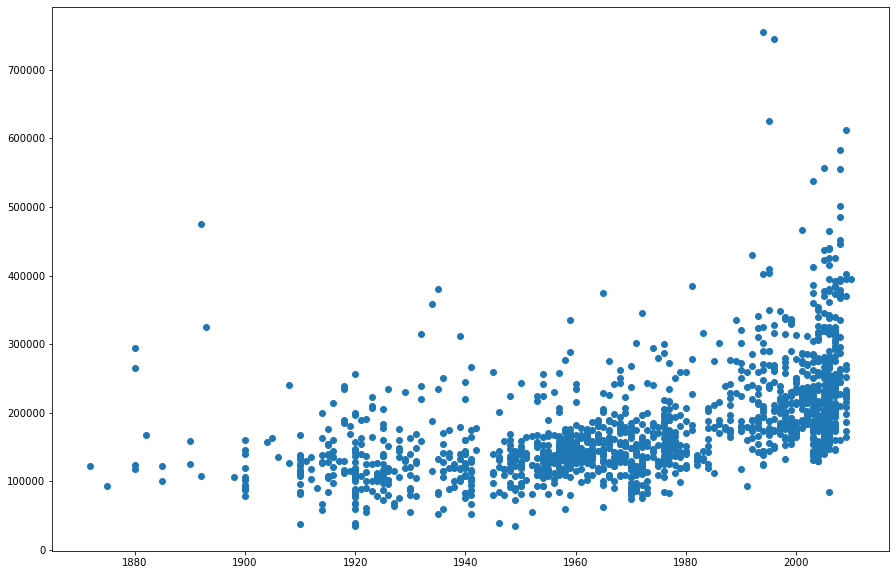

In [44]:
# although we can see a pattern here, this feature is highly correlated to many others, making model have high multicolinirarity

plt.figure(figsize=(15, 10))

plt.scatter(data['YearBuilt'],data['SalePrice'])

plt.show()

In [30]:
# so this is the features that we pre-selected for the numerical part

corr

,SalePrice,OverallQual,GarageCars,TotRmsAbvGrd,MasVnrArea,Fireplaces,BsmtFullBath,LotArea,WoodDeckSF
SalePrice,1.000000,0.790982,0.640409,0.533723,0.477493,0.466929,0.227122,0.263843,0.324413
OverallQual,0.790982,1.000000,0.600671,0.427452,0.411876,0.396765,0.111098,0.105806,0.238923
GarageCars,0.640409,0.600671,1.000000,0.362289,0.364204,0.300789,0.131881,0.154871,0.226342
TotRmsAbvGrd,0.533723,0.427452,0.362289,1.000000,0.280682,0.326114,-0.053275,0.190015,0.165984
MasVnrArea,0.477493,0.411876,0.364204,0.280682,1.000000,0.249070,0.085310,0.104160,0.159718
Fireplaces,0.466929,0.396765,0.300789,0.326114,0.249070,1.000000,0.137928,0.271364,0.200019
BsmtFullBath,0.227122,0.111098,0.131881,-0.053275,0.085310,0.137928,1.000000,0.158155,0.175315
LotArea,0.263843,0.105806,0.154871,0.190015,0.104160,0.271364,0.158155,1.000000,0.171698
WoodDeckSF,0.324413,0.238923,0.226342,0.165984,0.159718,0.200019,0.175315,0.171698,1.000000


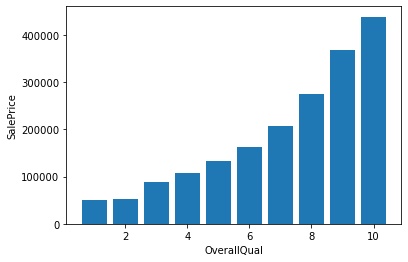

In [40]:
# now lets look on how they related to our target

# the OverallQual is the most correlated and its follows pretty mutch a good logic, higher the overall higher the price.

x1 = data.groupby('OverallQual').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['OverallQual'], x1['SalePrice'])
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

In [36]:
data['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

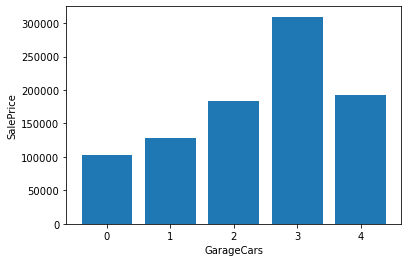

In [41]:
# the GarageCars however doest not follow a so standard way, it changes drastically from 2 to 3 then it reduces
# we may think of transforming this to a dummy categorical
# think of grouping

x1 = data.groupby('GarageCars').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['GarageCars'], x1['SalePrice'])
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.show()

In [39]:
data['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

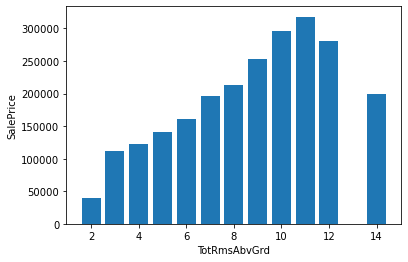

In [42]:
# this also has a pretty normal growth, besides the lump after 12
# whoever, given that the is only 1 house with 14 i dont think we should change the way to deal with it

x1 = data.groupby('TotRmsAbvGrd').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['TotRmsAbvGrd'], x1['SalePrice'])
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.show()

In [43]:
data['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

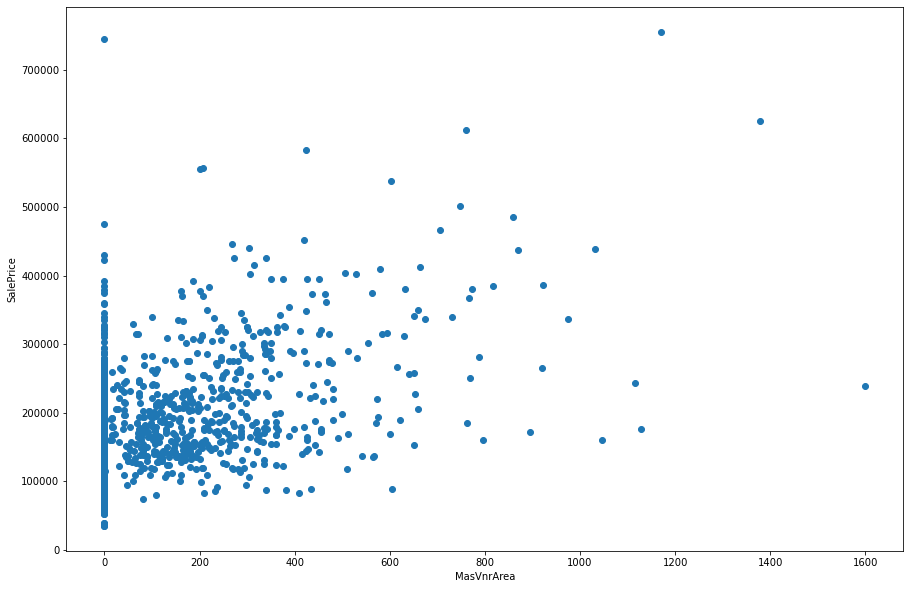

In [64]:
# looking at this graph we cant really tell if the price raises if the veneer area its bigger
# however it does have some geometrical shape, and we can test if it works

plt.figure(figsize=(15, 10))

plt.scatter(data['MasVnrArea'], data['SalePrice'])
plt.xlabel("MasVnrArea")
plt.ylabel("SalePrice")
plt.show()

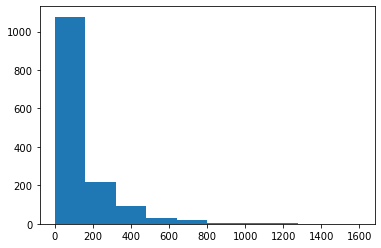

In [66]:
# this however has high kurtosis, so one think we can do is bining.

plt.hist(data['MasVnrArea'])
plt.show()

In [24]:
Q1 = data['MasVnrArea'].quantile(0.25)
Q3 = data['MasVnrArea'].quantile(0.75)
IQR = Q3 - Q1

In [26]:
((data['MasVnrArea'] < (Q1 - 1.5 * IQR)) | (data['MasVnrArea'] > (Q3 + 1.5 * IQR))).sum()/data['MasVnrArea'].count()

0.06611570247933884

In [46]:
data['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

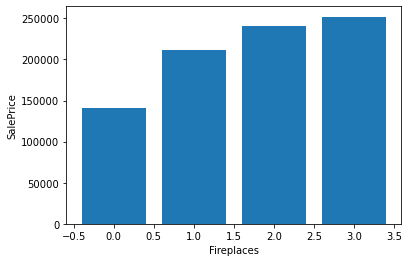

In [47]:
# here the fireplaces growth makes sense, so we probably keep it the way it is
# grouping or leaving as it is

x1 = data.groupby('Fireplaces').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['Fireplaces'], x1['SalePrice'])
plt.xlabel("Fireplaces")
plt.ylabel("SalePrice")
plt.show()

In [48]:
data['BsmtFullBath'].value_counts()


0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

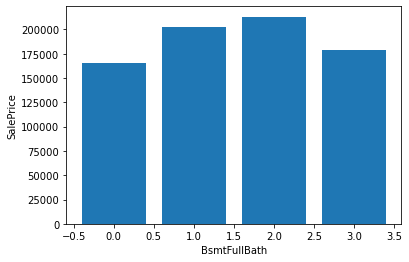

In [49]:
# the data here seems almost as if it is random
# we should probably drop this column

x1 = data.groupby('BsmtFullBath').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['BsmtFullBath'], x1['SalePrice'])
plt.xlabel("BsmtFullBath")
plt.ylabel("SalePrice")
plt.show()

In [50]:
data['LotArea'].value_counts()


7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

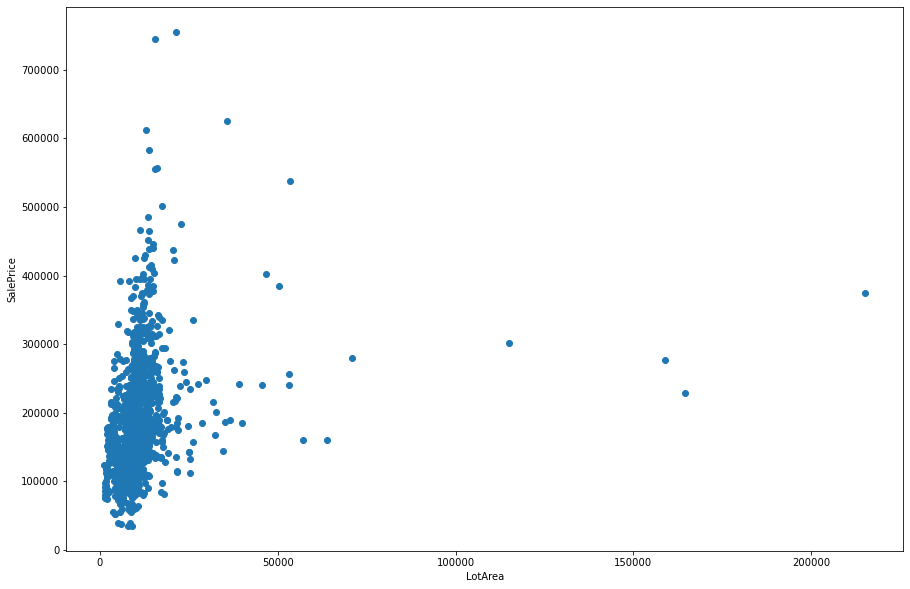

In [61]:
# the data here seems to be really clustered and its not giving us too much to work with
# we should probably not use this column

plt.figure(figsize=(15, 10))

plt.scatter(data['LotArea'], data['SalePrice'])
plt.xlabel("LotArea")
plt.ylabel("SalePrice")

plt.show()

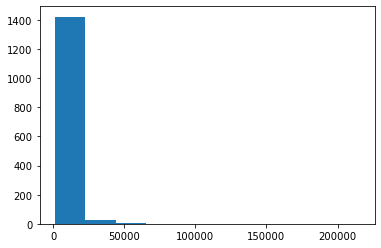

In [8]:
plt.hist(data['LotArea'])
plt.show()

In [62]:
data['WoodDeckSF'].value_counts()

0      761
192     38
100     36
144     33
120     31
      ... 
269      1
265      1
263      1
260      1
215      1
Name: WoodDeckSF, Length: 274, dtype: int64

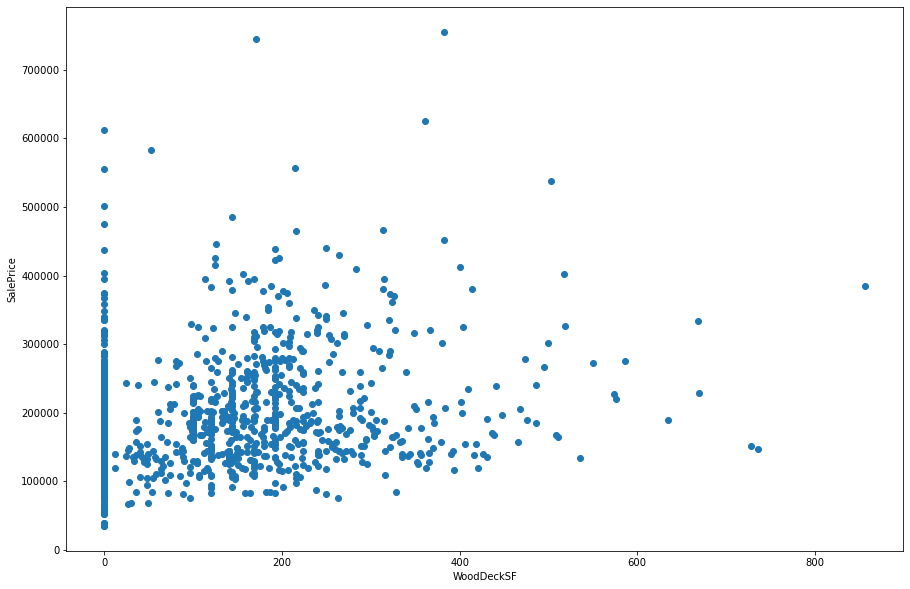

In [63]:
# now, besides the extreme amount of houses with no woodecks, it seems we can use this

plt.figure(figsize=(15, 10))

plt.scatter(data['WoodDeckSF'], data['SalePrice'])
plt.xlabel('WoodDeckSF')
plt.ylabel("SalePrice")

plt.show()

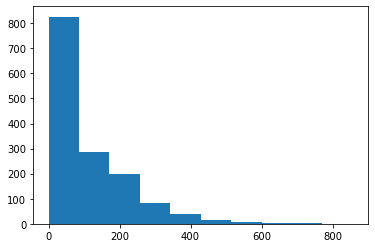

In [67]:
# this aswell has high kurtosis, so we may aswell bin it.

plt.hist(data['WoodDeckSF'])
plt.show()

In [ ]:
# Woodeck, LotArea - Review
# Fireplaces, Garage, Woodeck - Group
# BsmtFullBath, MasVnrArea - Drop

In [58]:
# this are the functions used to group and turn into boolean the features: fireplaces, wooddeck, bsmtfullbath and yearbuilt


def fireplaces(row):
    if row == 0:
        return 0
    else:
        return 1

def woodeck(row):
    if row == 0:
        return 0
    else:
        return 1
    
def bsmtfullbath(row):
    if row == 0:
        return 0
    else:
        return 1

In [15]:
data['Fireplaces?'] = data['Fireplaces'].apply(fireplaces)

In [16]:
data['WoodDeck?'] = data['WoodDeckSF'].apply(woodeck)

In [22]:
data['BsmtFullBath?'] = data['BsmtFullBath'].apply(bsmtfullbath)

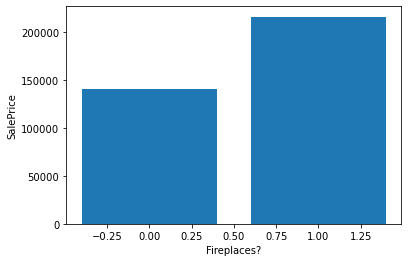

In [17]:
# the results of the masking

x1 = data.groupby('Fireplaces?').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['Fireplaces?'], x1['SalePrice'])
plt.xlabel("Fireplaces?")
plt.ylabel("SalePrice")
plt.show()

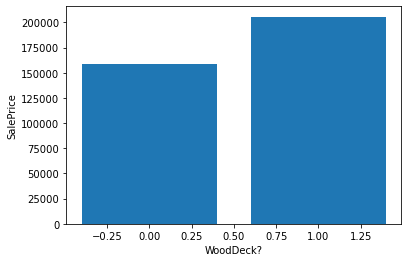

In [18]:
x1 = data.groupby('WoodDeck?').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['WoodDeck?'], x1['SalePrice'])
plt.xlabel("WoodDeck?")
plt.ylabel("SalePrice")
plt.show()

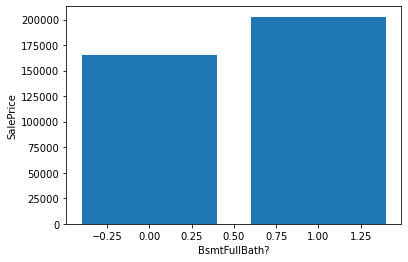

In [23]:
x1 = data.groupby('BsmtFullBath?').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['BsmtFullBath?'], x1['SalePrice'])
plt.xlabel("BsmtFullBath?")
plt.ylabel("SalePrice")
plt.show()

In [33]:
data['VnrArea/SF'] = data['MasVnrArea']/(data['1stFlrSF']+data['2ndFlrSF'])

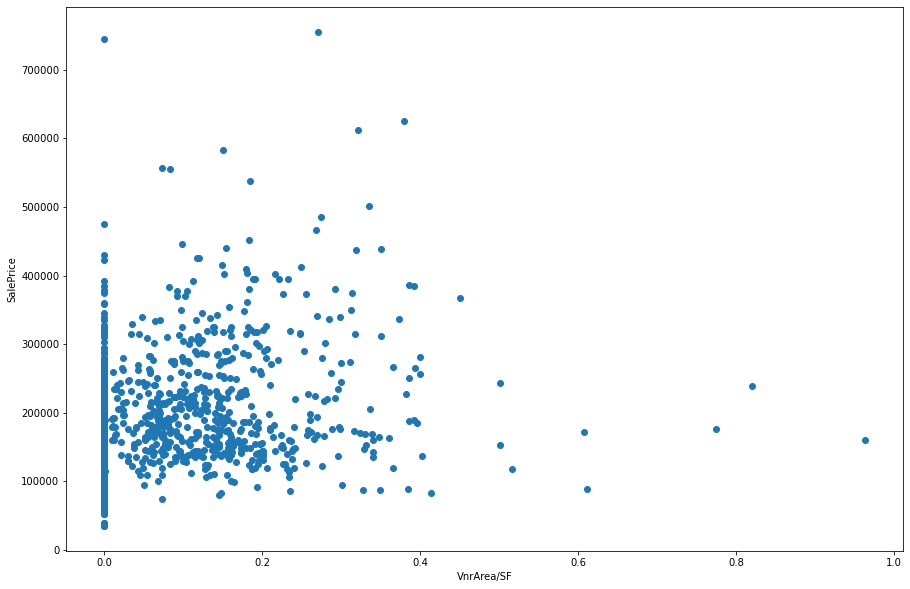

In [35]:
plt.figure(figsize=(15, 10))

plt.scatter(data['VnrArea/SF'], data['SalePrice'])
plt.xlabel('VnrArea/SF')
plt.ylabel("SalePrice")

plt.show()

In [40]:
# the privous correlation matrix

corr

,SalePrice,OverallQual,GarageCars,TotRmsAbvGrd,MasVnrArea,Fireplaces,BsmtFullBath,LotArea,WoodDeckSF
SalePrice,1.000000,0.790982,0.640409,0.533723,0.477493,0.466929,0.227122,0.263843,0.324413
OverallQual,0.790982,1.000000,0.600671,0.427452,0.411876,0.396765,0.111098,0.105806,0.238923
GarageCars,0.640409,0.600671,1.000000,0.362289,0.364204,0.300789,0.131881,0.154871,0.226342
TotRmsAbvGrd,0.533723,0.427452,0.362289,1.000000,0.280682,0.326114,-0.053275,0.190015,0.165984
MasVnrArea,0.477493,0.411876,0.364204,0.280682,1.000000,0.249070,0.085310,0.104160,0.159718
Fireplaces,0.466929,0.396765,0.300789,0.326114,0.249070,1.000000,0.137928,0.271364,0.200019
BsmtFullBath,0.227122,0.111098,0.131881,-0.053275,0.085310,0.137928,1.000000,0.158155,0.175315
LotArea,0.263843,0.105806,0.154871,0.190015,0.104160,0.271364,0.158155,1.000000,0.171698
WoodDeckSF,0.324413,0.238923,0.226342,0.165984,0.159718,0.200019,0.175315,0.171698,1.000000


In [57]:
# and the new one after the feature engineering

data[['SalePrice', 'OverallQual', 'GarageCars','TotRmsAbvGrd', 'Fireplaces?', 'BsmtFullBath?','WoodDeck?','VnrArea/SF']].corr()

,SalePrice,OverallQual,GarageCars,TotRmsAbvGrd,Fireplaces?,BsmtFullBath?,WoodDeck?,VnrArea/SF
SalePrice,1.000000,0.790982,0.640409,0.533723,0.471908,0.230846,0.297662,0.314199
OverallQual,0.790982,1.000000,0.600671,0.427452,0.438143,0.118715,0.274294,0.306976
GarageCars,0.640409,0.600671,1.000000,0.362289,0.349501,0.142707,0.240026,0.283285
TotRmsAbvGrd,0.533723,0.427452,0.362289,1.000000,0.330382,-0.057138,0.146028,0.128573
Fireplaces?,0.471908,0.438143,0.349501,0.330382,1.000000,0.084829,0.206934,0.192191
BsmtFullBath?,0.230846,0.118715,0.142707,-0.057138,0.084829,1.000000,0.147063,0.097763
WoodDeck?,0.297662,0.274294,0.240026,0.146028,0.206934,0.147063,1.000000,0.056948
VnrArea/SF,0.314199,0.306976,0.283285,0.128573,0.192191,0.097763,0.056948,1.000000
